In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df=pd.read_csv('credit_scoring.csv')

In [3]:
df.head()

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          150000 non-null  int64  
 1   Default                     150000 non-null  int64  
 2   Prct_uso_tc                 150000 non-null  float64
 3   Edad                        150000 non-null  int64  
 4   Nro_prestao_retrasados      150000 non-null  int64  
 5   Prct_deuda_vs_ingresos      150000 non-null  float64
 6   Mto_ingreso_mensual         120269 non-null  float64
 7   Nro_prod_financieros_deuda  150000 non-null  int64  
 8   Nro_retraso_60dias          150000 non-null  int64  
 9   Nro_creditos_hipotecarios   150000 non-null  int64  
 10  Nro_retraso_ultm3anios      150000 non-null  int64  
 11  Nro_dependiente             146076 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


In [5]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 ID                                0
Default                           0
Prct_uso_tc                       0
Edad                              0
Nro_prestao_retrasados            0
Prct_deuda_vs_ingresos            0
Mto_ingreso_mensual           29731
Nro_prod_financieros_deuda        0
Nro_retraso_60dias                0
Nro_creditos_hipotecarios         0
Nro_retraso_ultm3anios            0
Nro_dependiente                3924
dtype: int64


In [6]:
# Handling missing values in 'Mto_ingreso_mensual'
# Option 1: Replace with median
df['Mto_ingreso_mensual'].fillna(df['Mto_ingreso_mensual'].median(), inplace=True)

# # Option 2: Predictive imputation (if preferred)
# # Uncomment and use this block for predictive imputation
# from sklearn.linear_model import LinearRegression
# impute_df = df[df['Mto_ingreso_mensual'].notnull()]
# predict_df = df[df['Mto_ingreso_mensual'].isnull()]
# reg = LinearRegression()
# reg.fit(impute_df.drop(['Mto_ingreso_mensual', 'ID', 'Default'], axis=1), impute_df['Mto_ingreso_mensual'])
# predicted_values = reg.predict(predict_df.drop(['Mto_ingreso_mensual', 'ID', 'Default'], axis=1))
# df.loc[df['Mto_ingreso_mensual'].isnull(), 'Mto_ingreso_mensual'] = predicted_values

# Handling missing values in 'Nro_dependiente'
# Replace missing values with median
df['Nro_dependiente'].fillna(df['Nro_dependiente'].median(), inplace=True)

# Verify there are no missing values left
print("Missing Values After Imputation:\n", df.isnull().sum())

Missing Values After Imputation:
 ID                            0
Default                       0
Prct_uso_tc                   0
Edad                          0
Nro_prestao_retrasados        0
Prct_deuda_vs_ingresos        0
Mto_ingreso_mensual           0
Nro_prod_financieros_deuda    0
Nro_retraso_60dias            0
Nro_creditos_hipotecarios     0
Nro_retraso_ultm3anios        0
Nro_dependiente               0
dtype: int64


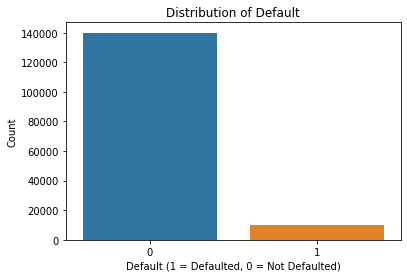

In [7]:
sns.countplot(x='Default', data=df)
plt.title("Distribution of Default")
plt.xlabel("Default (1 = Defaulted, 0 = Not Defaulted)")
plt.ylabel("Count")
plt.show()

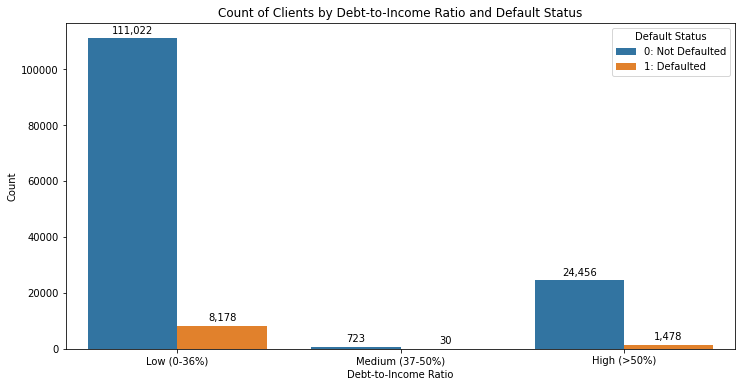

In [8]:
# Binning Debt-to-Income Ratio based on U.S. benchmarks
df['Debt_to_Income_Bin'] = pd.cut(
    df['Prct_deuda_vs_ingresos'],
    bins=[0, 36, 50, float('inf')],  # Realistic thresholds
    labels=['Low (0-36%)', 'Medium (37-50%)', 'High (>50%)'])
# Bar plot for Debt-to-Income Ratio by Default
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Debt_to_Income_Bin', hue='Default', data=df)
plt.title("Count of Clients by Debt-to-Income Ratio and Default Status")
plt.xlabel("Debt-to-Income Ratio")
plt.ylabel("Count")
for container in ax.containers:
    # Safely handle NaN values in the bar labels
    labels = [f'{int(value):,}' if not np.isnan(value) else '' for value in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, color='black', padding=3)
plt.legend(
    title="Default Status",
    labels=["0: Not Defaulted", "1: Defaulted"],
    loc='upper right')
plt.show()

In [ ]:
# # Binning Monthly Income in actual dollar ranges
# df['Income_Category'] = pd.cut(
#     df['Mto_ingreso_mensual'],
#     bins=[0, 2000, 4000, 6000, 10000, float('inf')],
#     labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
# )

# # Bar plot for Income Category by Default
# plt.figure(figsize=(12, 6))
# ax = sns.countplot(x='Income_Category', hue='Default', data=df)
# plt.title("Count of Clients by Monthly Income Category and Default Status")
# plt.xlabel("Income Category")
# plt.ylabel("Count")

# # Add count labels on top of each bar with commas
# for container in ax.containers:
#     # Format labels with commas
#     labels = [f'{int(value):,}' if value else '' for value in container.datavalues]
#     ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, color='black', padding=3)

# # Customizing the legend with color-coded descriptions
# plt.legend(
#     title="Default Status",
#     labels=["0: Not Defaulted", "1: Defaulted"],
#     loc='upper right'
# )

# plt.show()

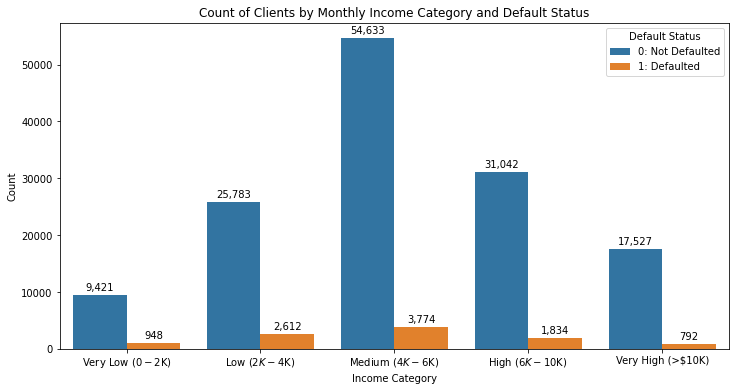

In [9]:
# Binning Monthly Income into realistic U.S.-based bins
df['Income_Category'] = pd.cut(
    df['Mto_ingreso_mensual'],
    bins=[0, 2000, 4000, 6000, 10000, float('inf')],
    labels=['Very Low ($0-$2K)', 'Low ($2K-$4K)', 'Medium ($4K-$6K)', 'High ($6K-$10K)', 'Very High (>$10K)'])
# Bar plot for Income Category by Default
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Income_Category', hue='Default', data=df)
plt.title("Count of Clients by Monthly Income Category and Default Status")
plt.xlabel("Income Category")
plt.ylabel("Count")
# Add count labels on top of each bar with commas
for container in ax.containers:
    # Format labels with commas
    labels = [f'{int(value):,}' if not np.isnan(value) else '' for value in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=10, color='black', padding=3)
# Customizing the legend with color-coded descriptions
plt.legend(
    title="Default Status",
    labels=["0: Not Defaulted", "1: Defaulted"],
    loc='upper right')
plt.show()

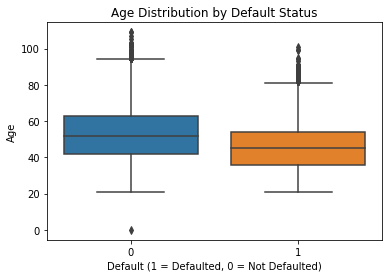

In [10]:
# Plot 3: Boxplot (Age Distribution by Default)
sns.boxplot(x='Default', y='Edad', data=df)
plt.title("Age Distribution by Default Status")
plt.xlabel("Default (1 = Defaulted, 0 = Not Defaulted)")
plt.ylabel("Age")
plt.show()

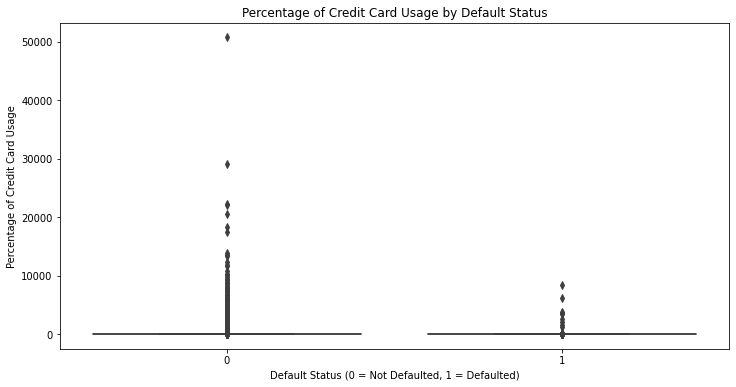

In [11]:
# Box plot for Percentage of Credit Card Usage by Default Status
plt.figure(figsize=(12, 6))
sns.boxplot(x='Default', y='Prct_uso_tc', data=df)
plt.title("Percentage of Credit Card Usage by Default Status")
plt.xlabel("Default Status (0 = Not Defaulted, 1 = Defaulted)")
plt.ylabel("Percentage of Credit Card Usage")
plt.show()


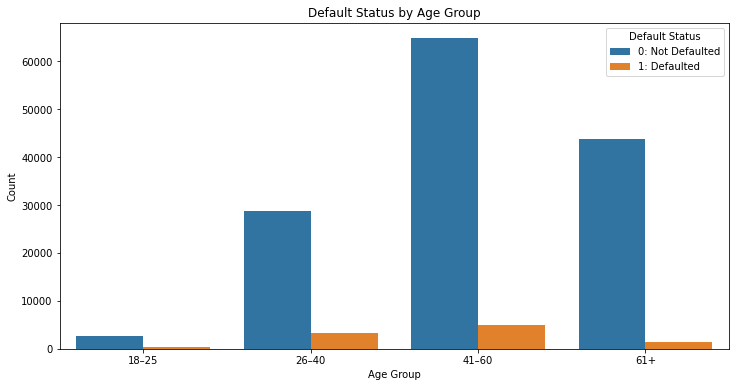

In [12]:
# Binning Age into groups
df['Age_Group'] = pd.cut(
    df['Edad'],
    bins=[18, 25, 40, 60, float('inf')],
    labels=['18–25', '26–40', '41–60', '61+']
)

# Bar plot for Age Groups by Default Status
plt.figure(figsize=(12, 6))
sns.countplot(x='Age_Group', hue='Default', data=df)
plt.title("Default Status by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Default Status", labels=["0: Not Defaulted", "1: Defaulted"])
plt.show()


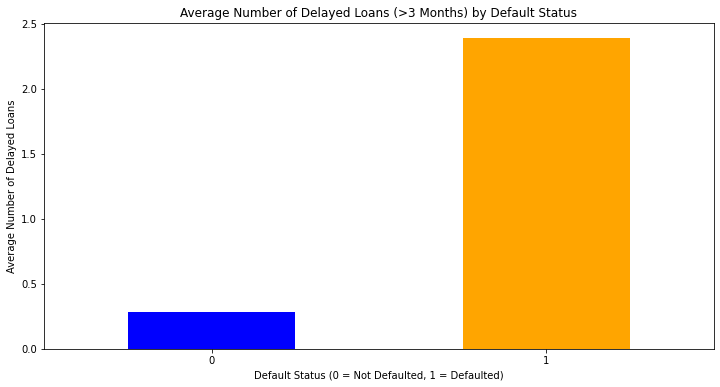

In [13]:
avg_delayed_loans = df.groupby('Default')['Nro_prestao_retrasados'].mean()

plt.figure(figsize=(12, 6))
avg_delayed_loans.plot(kind='bar', color=['blue', 'orange'])
plt.title("Average Number of Delayed Loans (>3 Months) by Default Status")
plt.xlabel("Default Status (0 = Not Defaulted, 1 = Defaulted)")
plt.ylabel("Average Number of Delayed Loans")
plt.xticks(rotation=0)
plt.show()

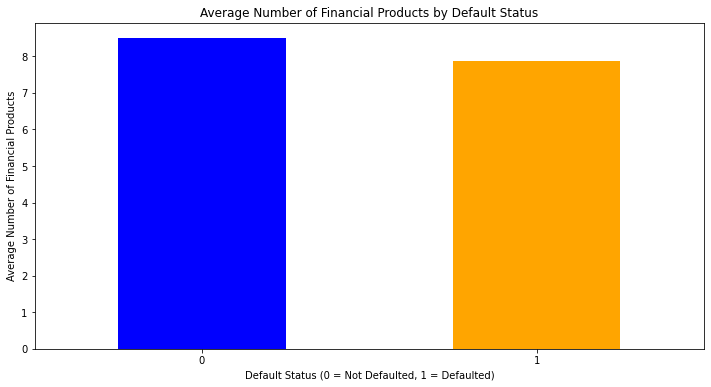

In [14]:
avg_financial_products = df.groupby('Default')['Nro_prod_financieros_deuda'].mean()

plt.figure(figsize=(12, 6))
avg_financial_products.plot(kind='bar', color=['blue', 'orange'])
plt.title("Average Number of Financial Products by Default Status")
plt.xlabel("Default Status (0 = Not Defaulted, 1 = Defaulted)")
plt.ylabel("Average Number of Financial Products")
plt.xticks(rotation=0)
plt.show()

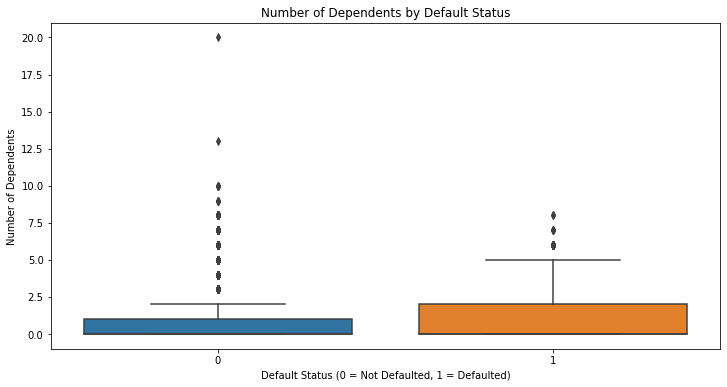

In [15]:
# Box plot for Number of Dependents by Default Status
plt.figure(figsize=(12, 6))
sns.boxplot(x='Default', y='Nro_dependiente', data=df)
plt.title("Number of Dependents by Default Status")
plt.xlabel("Default Status (0 = Not Defaulted, 1 = Defaulted)")
plt.ylabel("Number of Dependents")
plt.show()


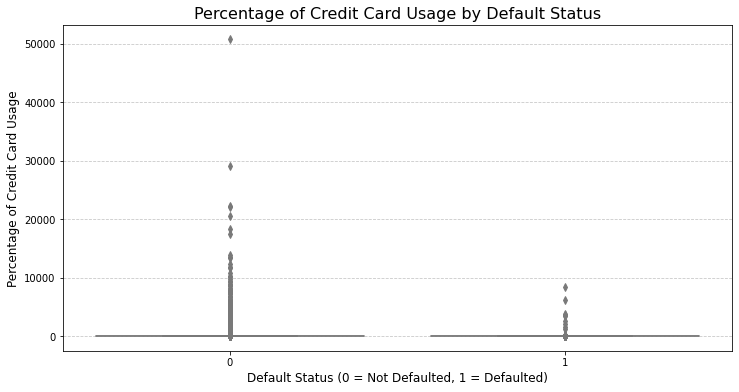

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Default', y='Prct_uso_tc', data=df, palette='coolwarm')
plt.title("Percentage of Credit Card Usage by Default Status", fontsize=16)
plt.xlabel("Default Status (0 = Not Defaulted, 1 = Defaulted)", fontsize=12)
plt.ylabel("Percentage of Credit Card Usage", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


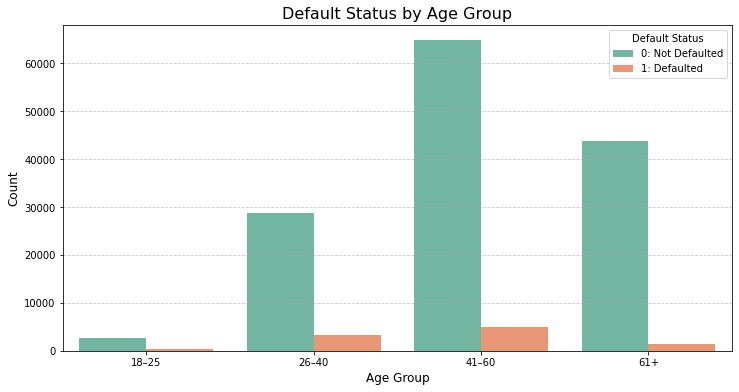

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Age_Group', hue='Default', data=df, palette='Set2')
plt.title("Default Status by Age Group", fontsize=16)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Default Status", labels=["0: Not Defaulted", "1: Defaulted"], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


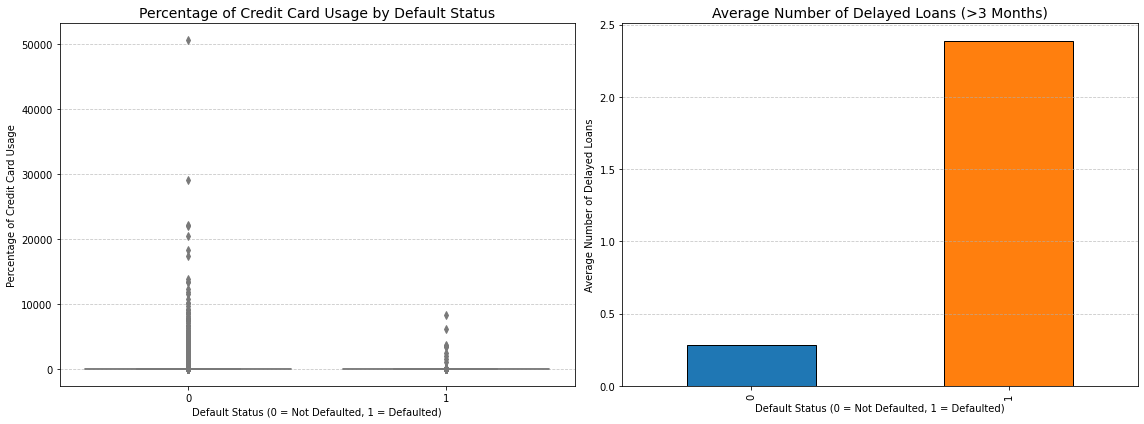

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(ax=axes[0], x='Default', y='Prct_uso_tc', data=df, palette='coolwarm')
axes[0].set_title("Percentage of Credit Card Usage by Default Status", fontsize=14)
axes[0].set_xlabel("Default Status (0 = Not Defaulted, 1 = Defaulted)")
axes[0].set_ylabel("Percentage of Credit Card Usage")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

avg_delayed_loans = df.groupby('Default')['Nro_prestao_retrasados'].mean()
avg_delayed_loans.plot(kind='bar', ax=axes[1], color=['#1f77b4', '#ff7f0e'], edgecolor='black')
axes[1].set_title("Average Number of Delayed Loans (>3 Months)", fontsize=14)
axes[1].set_xlabel("Default Status (0 = Not Defaulted, 1 = Defaulted)")
axes[1].set_ylabel("Average Number of Delayed Loans")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

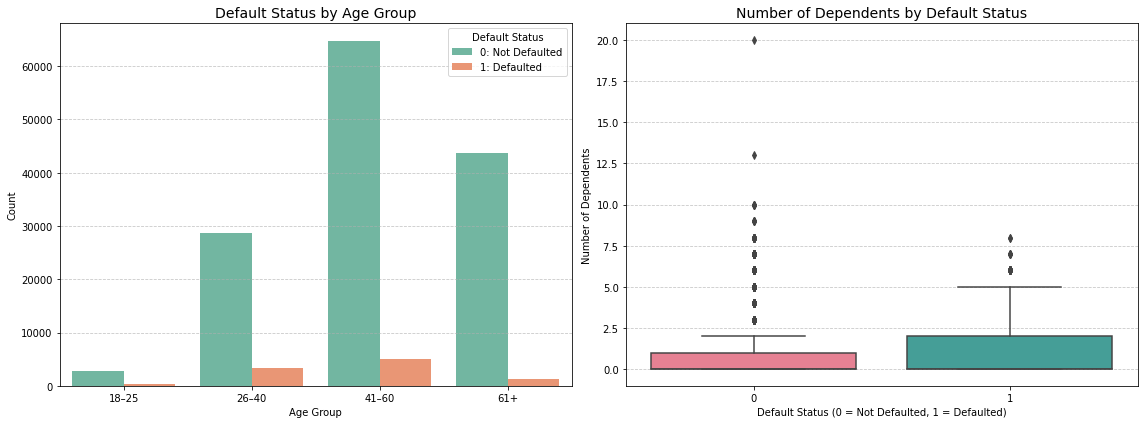

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(ax=axes[0], x='Age_Group', hue='Default', data=df, palette='Set2')
axes[0].set_title("Default Status by Age Group", fontsize=14)
axes[0].set_xlabel("Age Group")
axes[0].set_ylabel("Count")
axes[0].legend(title="Default Status", labels=["0: Not Defaulted", "1: Defaulted"], fontsize=10)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

sns.boxplot(ax=axes[1], x='Default', y='Nro_dependiente', data=df, palette='husl')
axes[1].set_title("Number of Dependents by Default Status", fontsize=14)
axes[1].set_xlabel("Default Status (0 = Not Defaulted, 1 = Defaulted)")
axes[1].set_ylabel("Number of Dependents")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

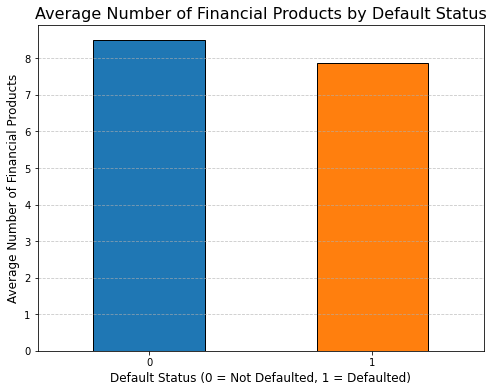

In [20]:
plt.figure(figsize=(8, 6))
avg_financial_products = df.groupby('Default')['Nro_prod_financieros_deuda'].mean()
avg_financial_products.plot(kind='bar', color=['#1f77b4', '#ff7f0e'], edgecolor='black')
plt.title("Average Number of Financial Products by Default Status", fontsize=16)
plt.xlabel("Default Status (0 = Not Defaulted, 1 = Defaulted)", fontsize=12)
plt.ylabel("Average Number of Financial Products", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Clusterring

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

numeric_cols = ['Prct_uso_tc', 'Edad', 'Nro_prestao_retrasados', 'Prct_deuda_vs_ingresos', 
                'Mto_ingreso_mensual', 'Nro_prod_financieros_deuda', 
                'Nro_retraso_60dias', 'Nro_creditos_hipotecarios', 'Nro_retraso_ultm3anios', 'Nro_dependiente']

df_numeric = df[numeric_cols].dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

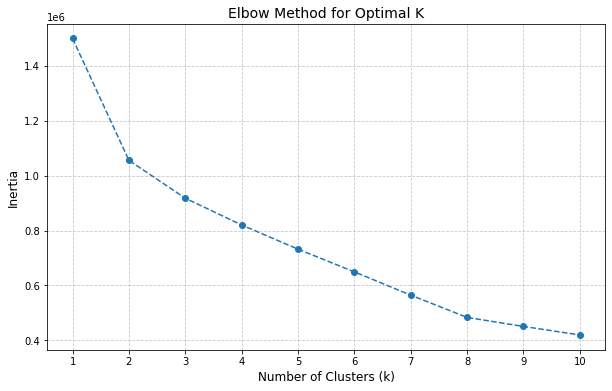

In [22]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal K", fontsize=14)
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Inertia", fontsize=12)
plt.xticks(k_range)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [31]:
# Based on the elbow curve, choose the optimal k (e.g., 3)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

df_numeric['Cluster'] = clusters

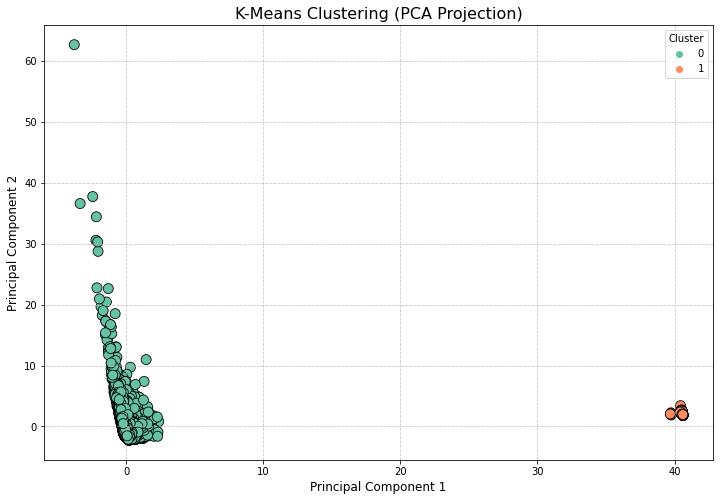

In [32]:
# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Create a dataframe for plotting
pca_df = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='Set2', s=100, edgecolor='black')
plt.title("K-Means Clustering (PCA Projection)", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.legend(title="Cluster", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Randomly sample a subset of the dataset
sampled_data = df_numeric.sample(n=10000, random_state=42)  # Adjust sample size as needed

# Standardize the sampled data
scaler = StandardScaler()
scaled_sampled_data = scaler.fit_transform(sampled_data)

# Perform hierarchical clustering on the sampled data
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(scaled_sampled_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title("Dendrogram for Sampled Data (DIANA)")
plt.xlabel("Sampled Data Points")
plt.ylabel("Euclidean Distance")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# from sklearn.cluster import AgglomerativeClustering

# # Perform Agglomerative Clustering directly
# agg_clustering = AgglomerativeClustering(
#     n_clusters=None,  # Set to None for full hierarchical clustering
#     distance_threshold=100,  # Set a threshold for cluster merging
#     linkage='ward'
# )

# # Fit the model
# agg_clustering.fit(scaled_data)

# # Assign clusters based on the threshold
# df_numeric['DIANA_Cluster'] = agg_clustering.labels_

# # Analyze clusters
# print(df_numeric['DIANA_Cluster'].value_counts())


In [ ]:
# from sklearn.metrics import silhouette_score, silhouette_samples
# import numpy as np

# # Calculate the silhouette score
# silhouette_avg = silhouette_score(scaled_data, clusters_agg)
# print(f"Silhouette Score: {silhouette_avg:.2f}")

# # Calculate silhouette values for each sample
# silhouette_vals = silhouette_samples(scaled_data, clusters_agg)

# # Plot silhouette scores for each cluster
# plt.figure(figsize=(10, 8))
# y_lower = 10
# for i in range(optimal_clusters):
#     ith_cluster_silhouette_vals = silhouette_vals[clusters_agg == i]
#     ith_cluster_silhouette_vals.sort()
#     size_cluster_i = ith_cluster_silhouette_vals.shape[0]
#     y_upper = y_lower + size_cluster_i

#     plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_vals)
#     plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

#     y_lower = y_upper + 10

# plt.axvline(x=silhouette_avg, color="red", linestyle="--")
# plt.title("Silhouette Plot for DIANA Clustering")
# plt.xlabel("Silhouette Coefficient Values")
# plt.ylabel("Cluster")
# plt.show()


### Classifications

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer


In [37]:
# Selecting the identified features and the target variable
selected_features = ['Prct_deuda_vs_ingresos', 'Mto_ingreso_mensual', 'Edad', 
                     'Nro_prestao_retrasados', 'Nro_dependiente', 'Prct_uso_tc']
target = 'Default'

# Handling missing values with imputation
imputer = SimpleImputer(strategy='mean')
df[selected_features] = imputer.fit_transform(df[selected_features])

# Splitting into features (X) and target variable (y)
X = df[selected_features]
y = df[target]

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Decision Tree Classifier

In [38]:
# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("----- Decision Tree -----")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

----- Decision Tree -----
Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94     28044
           1       0.20      0.23      0.22      1956

    accuracy                           0.89     30000
   macro avg       0.57      0.58      0.58     30000
weighted avg       0.90      0.89      0.89     30000



### Random Forest Classifier

In [39]:
# Building and training a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Making predictions
y_pred = rf_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9347666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     28044
           1       0.50      0.11      0.19      1956

    accuracy                           0.93     30000
   macro avg       0.72      0.55      0.58     30000
weighted avg       0.91      0.93      0.92     30000



### Naive Bayes Classifier

In [40]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# Initialize and train the model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
print("----- Naive Bayes -----")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


----- Naive Bayes -----
Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96     28044
           1       0.30      0.03      0.06      1956

    accuracy                           0.93     30000
   macro avg       0.62      0.51      0.51     30000
weighted avg       0.90      0.93      0.91     30000



### Support Vector Machine Classifier

In [ ]:
# Support Vector Machine Classifier
from sklearn.svm import SVC

# Initialize and train the model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("----- SVM -----")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


### K-Nearest Neighbors Classifier

In [41]:
# K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print("----- KNN -----")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


----- KNN -----
Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96     28044
           1       0.33      0.08      0.13      1956

    accuracy                           0.93     30000
   macro avg       0.63      0.54      0.55     30000
weighted avg       0.90      0.93      0.91     30000



## All together

In [ ]:
# # Importing required libraries
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import classification_report, accuracy_score

# # Initializing classifiers
# classifiers = {
#     'Decision Tree': DecisionTreeClassifier(random_state=42),
#     'Naive Bayes': GaussianNB(),
#     'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
#     'SVM': SVC(kernel='linear', random_state=42),
#     'KNN': KNeighborsClassifier(n_neighbors=5)
# }

# # Training and evaluating classifiers
# for name, classifier in classifiers.items():
#     print(f"--- {name} ---")
    
#     # Train the model
#     classifier.fit(X_train, y_train)
    
#     # Predict on the test set
#     y_pred = classifier.predict(X_test)
    
#     # Evaluate the model
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f"Accuracy: {accuracy:.2f}")
#     print("Classification Report:\n", classification_report(y_test, y_pred))
#     print("\n")
